<a href="https://colab.research.google.com/github/christeeno/patent-model-trail/blob/main/patentypeshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessory library

In [ ]:
import pandas as pd
import numpy as np

## LOAD AND COMBINE DATA

In [ ]:
data_mat=pd.read_csv("student-mat.csv", sep=';')
data_por=pd.read_csv("student-por.csv", sep=';')

In [ ]:
combined_df = pd.concat([data_mat, data_por], ignore_index=True)
print(f"Combined dataset size: {len(combined_df)} students.")

Combined dataset size: 1044 students.


##DATA SELECTION AND PREPARATION

In [ ]:

data = combined_df[[ 'sex', 'age', 'Pstatus',  'reason','traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities',
        'internet', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2',"G3"]]


display(data.head())

,sex,age,Pstatus,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,internet,famrel,freetime,goout,health,absences,G1,G2,G3
0,F,18,A,course,2,2,0,yes,no,no,no,no,4,3,4,3,6,5,6,6
1,F,17,T,course,1,2,0,no,yes,no,no,yes,5,3,3,3,4,5,5,6
2,F,15,T,other,1,2,3,yes,no,yes,no,yes,4,3,2,3,10,7,8,10
3,F,15,T,home,1,3,0,no,yes,yes,yes,yes,3,2,2,5,2,15,14,15
4,F,16,T,home,1,2,0,no,yes,yes,no,no,4,3,2,5,4,6,10,10


In [ ]:
data['Serial_Number'] = range(1, len(data) + 1)

# Get the column names
cols = data.columns.tolist()

# Move 'Serial_Number' to the beginning
cols = ['Serial_Number'] + [col for col in cols if col != 'Serial_Number']

# Reindex the DataFrame with the new column order
data = data[cols]

display(data.head())

/tmp/ipython-input-582831313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Serial_Number'] = range(1, len(data) + 1)


,Serial_Number,sex,age,Pstatus,reason,traveltime,studytime,failures,schoolsup,famsup,...,activities,internet,famrel,freetime,goout,health,absences,G1,G2,G3
0,1,F,18,A,course,2,2,0,yes,no,...,no,no,4,3,4,3,6,5,6,6
1,2,F,17,T,course,1,2,0,no,yes,...,no,yes,5,3,3,3,4,5,5,6
2,3,F,15,T,other,1,2,3,yes,no,...,no,yes,4,3,2,3,10,7,8,10
3,4,F,15,T,home,1,3,0,no,yes,...,yes,yes,3,2,2,5,2,15,14,15
4,5,F,16,T,home,1,2,0,no,yes,...,no,no,4,3,2,5,4,6,10,10


##Data visualization

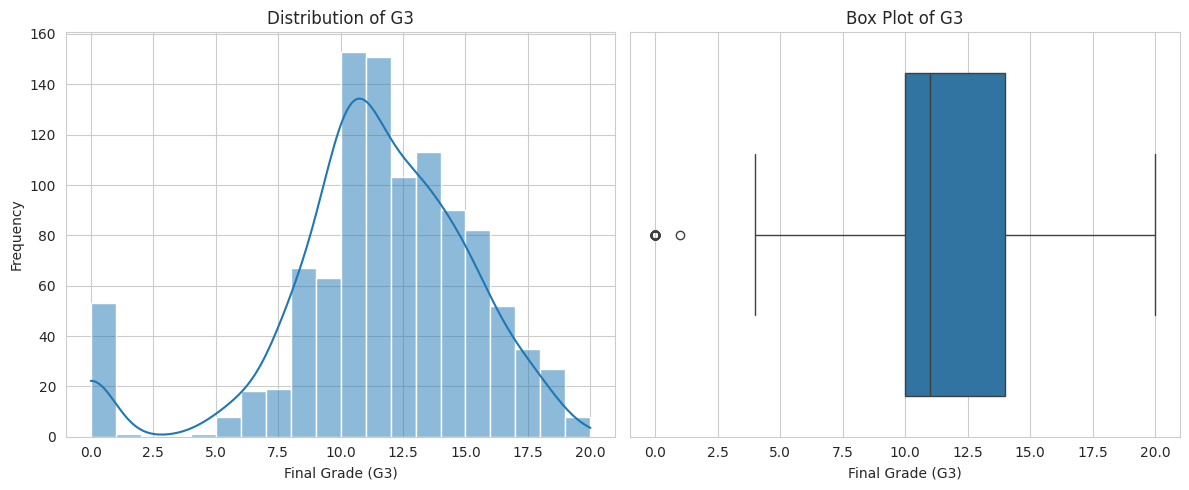

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribution of G3')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['G3'])
plt.title('Box Plot of G3')
plt.xlabel('Final Grade (G3)')

plt.tight_layout()
plt.show()

In [ ]:
X = data.drop('Serial_Number', axis=1).iloc[:, :-1]
y=data.iloc[:,-1].values

##DATA PREPROCESSING


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
                       remainder='passthrough')
X= ct.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##MODEL TRAINING


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.98
Root Mean Squared Error (RMSE): 1.73
R-squared (R2): 0.76


##Display predictions vs. actual

In [ ]:


np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6.96  6.  ]
 [ 8.4  10.  ]
 [15.83 15.  ]
 [13.14 13.  ]
 [ 7.9   8.  ]
 [11.52 11.  ]
 [10.96 12.  ]
 [13.26 14.  ]
 [14.27 16.  ]
 [11.41 14.  ]
 [17.84 18.  ]
 [ 6.77  8.  ]
 [ 9.94  9.  ]
 [14.66 14.  ]
 [10.08 10.  ]
 [ 9.56  8.  ]
 [14.54 14.  ]
 [13.62 13.  ]
 [ 9.7   9.  ]
 [ 7.39  7.  ]
 [ 0.83  6.  ]
 [17.63 17.  ]
 [ 8.71 10.  ]
 [17.65 17.  ]
 [ 9.69 11.  ]
 [ 9.5  11.  ]
 [10.06 11.  ]
 [13.75 13.  ]
 [11.08 11.  ]
 [11.07 11.  ]
 [11.77 12.  ]
 [16.55 15.  ]
 [12.24 12.  ]
 [ 8.8   8.  ]
 [12.24 12.  ]
 [ 9.67 10.  ]
 [12.95 13.  ]
 [10.24 10.  ]
 [12.91 11.  ]
 [12.59 13.  ]
 [13.1  13.  ]
 [10.27 10.  ]
 [16.33 16.  ]
 [ 0.16  0.  ]
 [12.59 13.  ]
 [ 0.07  0.  ]
 [10.09 10.  ]
 [11.71 12.  ]
 [13.18 14.  ]
 [10.07 10.  ]
 [ 9.58  8.  ]
 [16.47 16.  ]
 [11.46 11.  ]
 [ 8.22  8.  ]
 [14.57 15.  ]
 [ 9.56 10.  ]
 [13.21 13.  ]
 [10.14 10.  ]
 [12.61 14.  ]
 [ 8.08  8.  ]
 [10.32 11.  ]
 [10.24 10.  ]
 [10.03 10.  ]
 [11.34 12.  ]
 [10.98 11.  ]
 [11.35 11.  ]
 [12.2  11

##CLASSIFICATION BASED ON ATTENTION

In [ ]:
def classify_attention(predicted_g3, data, percentage=0.20):

  average_g3 = data['G3'].mean()
  low_threshold = average_g3 * (1 - percentage)
  high_threshold = average_g3 * (1 + percentage)


  if predicted_g3 < low_threshold:
    return 'High Attention'
  elif predicted_g3 >= high_threshold:
    return 'Low Attention'
  else:
    return 'Medium Attention'

# Calculate attention levels for the entire dataset
attention_levels_full_data = [classify_attention(score, data) for score in data['G3']]

high_attention=[]
medium_attention=[]
low_attention=[]

# Iterate through the full data to populate the attention lists with Serial Numbers
for i in range(len(data)):
  if attention_levels_full_data[i] == 'High Attention':
    high_attention.append(data['Serial_Number'].iloc[i]) # Use Serial_Number
  elif attention_levels_full_data[i] == 'Medium Attention':
    medium_attention.append(data['Serial_Number'].iloc[i]) # Use Serial_Number
  elif attention_levels_full_data[i] == 'Low Attention':
    low_attention.append(data['Serial_Number'].iloc[i]) # Use Serial_Number


First 10 students and their attention levels:
Student G3: 6.00, Attention Level: High Attention
Student G3: 6.00, Attention Level: High Attention
Student G3: 10.00, Attention Level: Medium Attention
Student G3: 15.00, Attention Level: Low Attention
Student G3: 10.00, Attention Level: Medium Attention
Student G3: 15.00, Attention Level: Low Attention
Student G3: 11.00, Attention Level: Medium Attention
Student G3: 6.00, Attention Level: High Attention
Student G3: 19.00, Attention Level: Low Attention
Student G3: 15.00, Attention Level: Low Attention


In [ ]:
print("High Attention Serial Numbers:")
print([int(sn) for sn in high_attention])

print("\nMedium Attention Serial Numbers:")
print([int(sn) for sn in medium_attention])

print("\nLow Attention Serial Numbers:")
print([int(sn) for sn in low_attention])

High Attention Serial Numbers:
[1, 2, 8, 11, 19, 25, 26, 36, 45, 46, 50, 59, 63, 64, 68, 69, 73, 80, 83, 86, 87, 90, 91, 93, 100, 101, 104, 107, 115, 119, 125, 128, 129, 131, 132, 135, 136, 137, 138, 141, 142, 145, 147, 149, 151, 154, 156, 161, 162, 163, 165, 169, 171, 174, 175, 176, 178, 179, 181, 184, 189, 192, 193, 204, 206, 207, 210, 211, 214, 217, 218, 219, 221, 222, 226, 229, 233, 235, 240, 243, 245, 248, 249, 251, 253, 254, 256, 260, 262, 264, 265, 270, 271, 277, 278, 279, 281, 297, 298, 308, 311, 317, 318, 322, 329, 331, 333, 334, 335, 338, 342, 344, 348, 351, 353, 354, 356, 368, 371, 374, 382, 384, 385, 387, 388, 389, 390, 391, 393, 395, 414, 448, 477, 496, 521, 527, 544, 546, 551, 557, 559, 564, 568, 570, 571, 573, 574, 575, 615, 635, 644, 651, 652, 653, 658, 659, 675, 678, 680, 701, 743, 766, 824, 828, 832, 836, 837, 839, 841, 843, 849, 850, 851, 861, 872, 874, 878, 880, 884, 887, 890, 896, 898, 904, 908, 909, 910, 914, 915, 916, 918, 919, 920, 924, 926, 928, 939, 941, 959, 